# Drug discovery challenge:

Implement a ligand-based (only small molecules) binary classifier that is able to distinguish between actives and inactives against the HIV-1 protein. Start with molecular representations that are 1D (regular descriptors: number heavy atoms, molecular weight, ...). Your task consists on:
- Build a pipeline with your ML framework of choice (sklearn recommended) using diferent features and models.
- Evaluate your models with AUC-ROC style of metrics. Do not train with test_molecules.csv

# Dataset description

The HIV dataset was introduced by the Drug Therapeutics Program (DTP) AIDS Antiviral Screen, which tested the ability to inhibit HIV replication for over 40,000 compounds. Screening results were evaluated and placed into three categories: confirmed inactive (CI),confirmed active (CA) and confirmed moderately active (CM). We further combine the latter two labels, making it a classification task between inactive (CI) and active (CA and CM)". 

# Representation of chemical data

Before even getting into programming the ML classifier, we need to featurize the molecules:

    - SMILES and 1D descriptors
    - A graph with some nodes and edges, pattern strings
    - 3D coordinates, vector fields

## SMILES representation

**SMILES (Simplified Molecular Input Line Entry System)**


This is the simplest way to reflect a molecule. The idea behind is to use simple line notations for chemical formulas that are based on some rules. Atoms of chemical elements are represented by chemical symbols in capital letter, hydrogen is usually ignored. Single bonds are not displayed; for double, triple and quadruple bonds we shall use *'='*, *'#'*, *'$'* respectively. Atoms that are bonded must stand nearby. Ring structures are written by breaking each ring at an arbitrary point (although some choices will lead to a more legible SMILES than others) to make a 'straight non-ring' structure (as if it wasn't a ring) and adding numerical ring closure labels to show connectivity between non-adjacent atoms. Aromacity is commonly illustrated by writing the constituent B, C, N, O, P and S atoms in lower-case forms b, c, n, o, p and s, respectively. To represent side chains of atomic gpoups branches are used.

<img src="http://www.daylight.com/dayhtml/doc/theory/theory4.gif"/>


## Graphs and fingerprints

**2D Fingerprints**: Molecular fingerprints are a way of encoding the structure of a molecule. The most common type of fingerprint is a series of binary digits (bits) that represent the presence or absence of particular substructures in the molecule. Comparing fingerprints allows you to determine the similarity between two molecules, to find matches to a query substructure, etc.

<img src="https://www.researchgate.net/profile/Dong-Sheng-Cao/publication/235919348/figure/fig1/AS:299748008448007@1448476902809/Representation-of-a-molecular-substructure-fingerprint-with-a-substructure-fingerprint.png"/>

**Molecular Graph**: Molecules are simply atoms joined together by bonds. These atoms may well be of different types, and the bonds might also be different, but this sounds a lot like a graph where the atoms are the vertices and the bonds are the edges of our graph!

<img src="https://i0.wp.com/www.blopig.com/blog/wp-content/uploads/2019/01/molecule_graph.png?ssl=1"/>


## 3D descriptors: Conformations, Coulumb fields, shape descriptors



<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41597-022-01288-4/MediaObjects/41597_2022_1288_Fig1_HTML.png?as=webp"/>

## Basic imports

In [13]:
import rdkit
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# RDKIT basics

## Loading the data

In [37]:
hiv = pd.read_csv('data/molecules_HIV.csv')
hiv.head()

,Smiles,Experimental activity,Label
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0


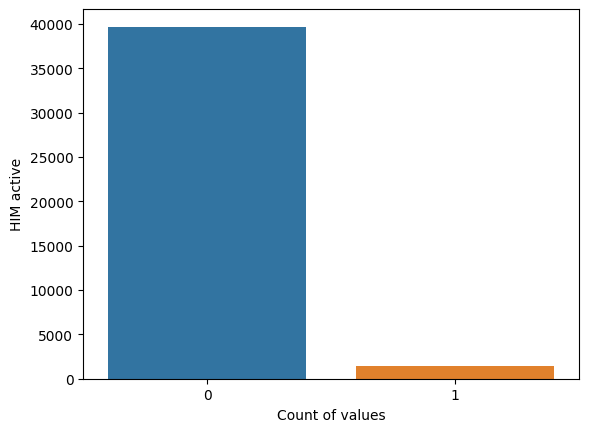

In [14]:
# Class imbalance
sns.countplot(data = hiv, x='HIV_active', orient='v')
plt.ylabel('Num of molecules')
plt.xlabel('Class 0: inactives and Class 1: Actives')
plt.show()